# Análise Exploratória dos Dados
* Conjunto de dados: `spanish_wines` (qualidade do vinho espanhol)
* Equipe: 

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [2]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown

# sns.set_style("whitegrid")
sns.set_theme(style="whitegrid", palette="colorblind")


In [3]:
# @title Leitura do conjunto de dados
df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/main/spanish_wines.csv')

In [4]:
# @title Primeiras informações sobre o conjunto de dados
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informações das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


### Últimas linhas

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


### Informações das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


### Quantidade de valores únicos

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 7500 unidades amostrais com 11 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `rating`, `price`
    - Quantitativa discreta: `year`, `num_reviews`
    - Qualitativa nominal: `winery`, `wine`, `country`, `region`, `type`
    - Qualitativa ordinal: `body`, `acidity`
---

---
* Excluir a coluna country porque não é interessante já que todos os dados são da Espanha.
---

In [5]:
df = df.drop(columns=["country"])
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


---
* A variável `year` está como object, transformar em int.
---

In [6]:
# Converter 'year' para numérico e remover linhas com NaN
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"]).copy()  # Remove linhas onde 'year' é NaN
df["year"] = df["year"].astype(int)  # Converter para inteiro

In [7]:
# @title Dados faltantes

# percentual de dados faltantes em cada coluna

round((df.isna()).sum() / df.shape[0] * 100, 2)

winery          0.00
wine            0.00
year            0.00
rating          0.00
num_reviews     0.00
region          0.00
price           0.00
type            7.46
body           15.81
acidity        15.81
dtype: float64

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Função para imputar variáveis categóricas ausentes
def impute_missing_values(df, target_column):
    # Dividir os dados em treinamento e imputação
    train = df[df[target_column].notnull()]
    missing = df[df[target_column].isnull()]
    
    # One-hot encoding para variáveis preditoras
    X_train = pd.get_dummies(train.drop(columns=[target_column]), drop_first=True)
    y_train = train[target_column]
    
    X_missing = pd.get_dummies(missing.drop(columns=[target_column]), drop_first=True)
    # Garantir que as colunas correspondam entre treino e imputação
    X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

    # Treinar o modelo
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prever os valores ausentes
    missing[target_column] = model.predict(X_missing)
    
    # Atualizar o DataFrame original
    df.update(missing)
    return df

# Imputar valores ausentes para 'type'
df = impute_missing_values(df, 'type')

# Imputar valores ausentes para 'body'
df = impute_missing_values(df, 'body')

# Imputar valores ausentes para 'acidity'
df = impute_missing_values(df, 'acidity')

# Verificar se existem dados ausentes remanescentes
print("Dados faltantes após imputação:")
print(df.isnull().sum())

C:\Users\mulle\AppData\Local\Temp\ipykernel_13628\3375540829.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[target_column] = model.predict(X_missing)
C:\Users\mulle\AppData\Local\Temp\ipykernel_13628\3375540829.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2013 2018 2009 ... 2017 2011 2016]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.update(missing)
C:\Users\mulle\AppData\Local\Temp\ipykernel_13628\3375540829.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Dados faltantes após imputação:
winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


C:\Users\mulle\AppData\Local\Temp\ipykernel_13628\3375540829.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing[target_column] = model.predict(X_missing)


In [9]:
df['acidity'].unique()

array([3., 2., 1.])

In [10]:
# Mapear valores e converter para categórico ordenado
mapeamento_body = {
    1.0: "Muito leve",
    2.0: "Leve",
    3.0: "Medio",
    4.0: "Encorpado",
    5.0: "Muito encorpado"
}

df['body_imputed'] = df['body'].map(mapeamento_body)
df['body_imputed'] = pd.Categorical(
    df['body_imputed'],
    categories=["Muito leve", "Leve", "Médio", "Encorpado", "Muito encorpado"],
    ordered=True
)

df['body_imputed'].value_counts()

body_imputed
Encorpado          4771
Muito encorpado    1785
Leve                 38
Muito leve            0
Médio                 0
Name: count, dtype: int64

In [11]:
# Mapear valores e converter para categórico ordenado
mapeamento_acidity = {
    1.0: "Muito baixa",
    2.0: "Baixa",
    3.0: "Media",
    4.0: "Alta",
    5.0: "Muito alta"
}

df['acidity_imputed'] = df['acidity'].map(mapeamento_acidity)
df['acidity_imputed'] = pd.Categorical(
    df['acidity_imputed'],
    categories=["Muito baixa", "Baixa", "Media", "Alta", "Muito alta"],
    ordered=True
)

df['acidity_imputed'].value_counts()

acidity_imputed
Media          6893
Baixa           290
Muito baixa      27
Alta              0
Muito alta        0
Name: count, dtype: int64

In [12]:
df.drop(['body','acidity'], axis=1, inplace=True)

In [13]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body_imputed,acidity_imputed
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,Muito encorpado,Media
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,Encorpado,Baixa
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,Muito encorpado,Media
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,Muito encorpado,Media
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,Muito encorpado,Media


## Descrição dos Dados

In [14]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
        {
            'variavel': 'winery', 
            'descricao': 'nome da vinicola', 
            'tipo': 'qualitativa', 
            'subtipo': 'nominal'
        },
        {
            'variavel': 'wine', 
            'descricao': 'nome do vinho', 
            'tipo': 'qualitativa', 
            'subtipo': 'nominal'
        },
        {
            'variavel': 'year', 
            'descricao': 'ano em que as uvas foram colhidas', 
            'tipo': 'quantitativa', 
            'subtipo': 'discreta'
        },
        {
            'variavel': 'rating', 
            'descricao': 'classificacao media dada ao vinho pelos usuarios (de 1 a 5)', 
            'tipo': 'quantitativa', 
            'subtipo': 'continua'
        },
        {
            'variavel': 'num_reviews', 
            'descricao': 'numero de avaliacoes do vinho', 
            'tipo': 'quantitativa', 
            'subtipo': 'discreta'
        },
        {
            'variavel': 'region', 
            'descricao': 'regiao do vinho', 
            'tipo': 'qualitativa', 
            'subtipo': 'nominal'
        },
        {
            'variavel': 'price', 
            'descricao': 'preco do vinho (€)', 
            'tipo': 'quantitativa', 
            'subtipo': 'continua'
        },
         {
            'variavel': 'type', 
            'descricao': 'variedade do vinho', 
            'tipo': 'qualitativa', 
            'subtipo': 'nominal'
        },
        {
            'variavel': 'body_imputed', 
            'descricao': 'rotulo de corpo', 
            'tipo': 'qualitativa', 
            'subtipo': 'ordinal'
        },
        {
            'variavel': 'acidity_imputed', 
            'descricao': 'rotulo de acidez ', 
            'tipo': 'qualitativa', 
            'subtipo': 'ordinal'
        }
    ])
df_dict

,variavel,descricao,tipo,subtipo
0,winery,nome da vinicola,qualitativa,nominal
1,wine,nome do vinho,qualitativa,nominal
2,year,ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,classificacao media dada ao vinho pelos usuari...,quantitativa,continua
4,num_reviews,numero de avaliacoes do vinho,quantitativa,discreta
5,region,regiao do vinho,qualitativa,nominal
6,price,preco do vinho (€),quantitativa,continua
7,type,variedade do vinho,qualitativa,nominal
8,body_imputed,rotulo de corpo,qualitativa,ordinal
9,acidity_imputed,rotulo de acidez,qualitativa,ordinal


## Análise Univariada

In [15]:
# @title Resumo estatístico após tratamento dos dados faltantes

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

         winery     wine region       type
count      7210     7210   7210       7210
unique      445      777     72         21
top     Contino  Reserva  Rioja  Rioja Red
freq        457      467   2440       2358


### Variáveis quantitativas

              year       rating   num_reviews        price
count  7210.000000  7210.000000   7210.000000  7210.000000
mean   2013.495839     4.255381    448.206935    61.508695
std       6.940450     0.118609    615.388822   152.837021
min    1910.000000     4.200000     25.000000     5.500000
25%    2011.000000     4.200000    389.000000    19.900000
50%    2015.000000     4.200000    404.000000    28.530000
75%    2017.000000     4.200000    415.000000    53.775000
max    2021.000000     4.900000  16505.000000  3119.080000


---
 - A região `Rioja` é a que mais possui registros, e `Rioja Red` é o vinho que mais aparece.
 - `Contino` é a vinícula com maior frequência, e `Reserva` o vinho mais popular.
 - O preço médio do vinho é de `61,50 €`, com mediana de `28,53 €`.
---

## Distribuição das Variáveis

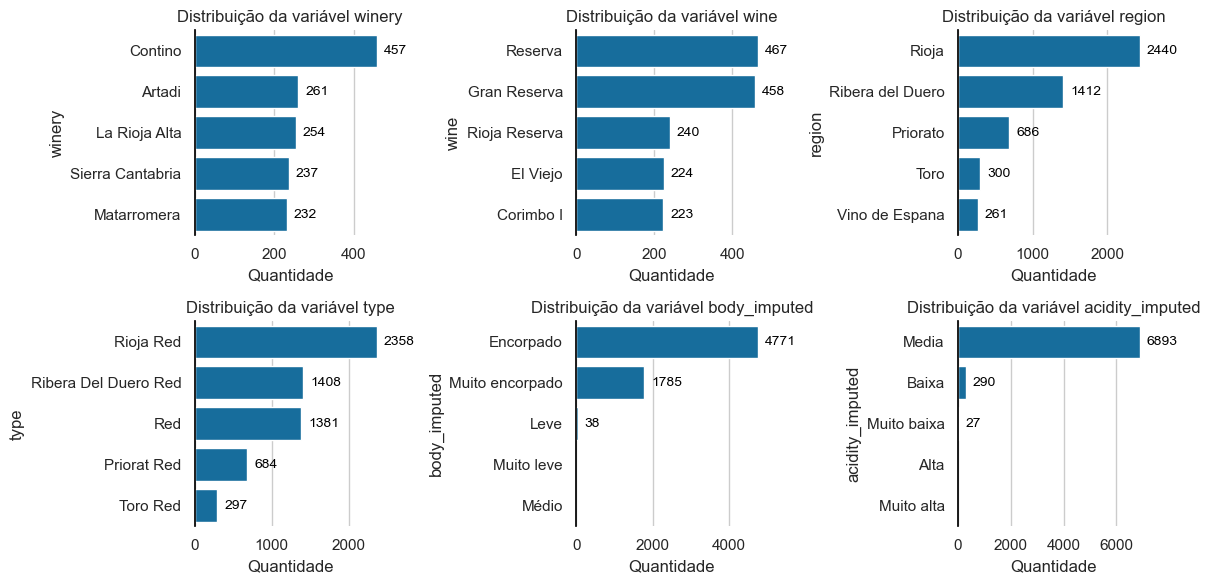

In [16]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index[:5] # Pegar os 5 valores mais frequentes
    ax = axes[i]
    # Criar a figura
    ax = sns.countplot(data=df, y=variavel, order=order, alpha=1, ax=ax)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

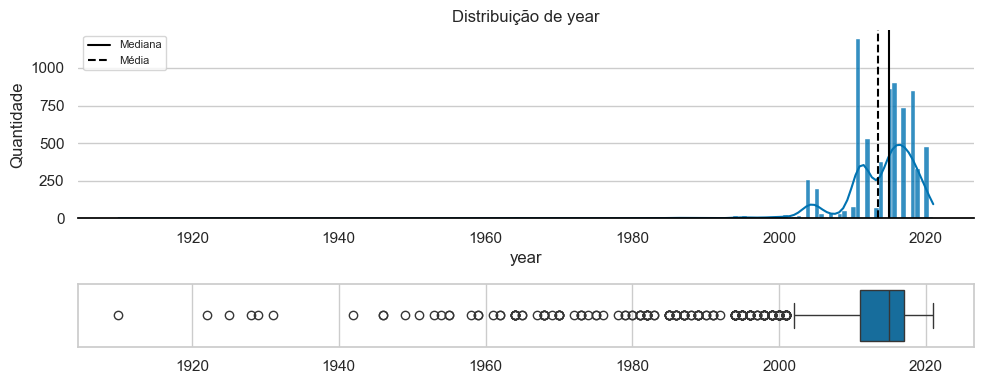

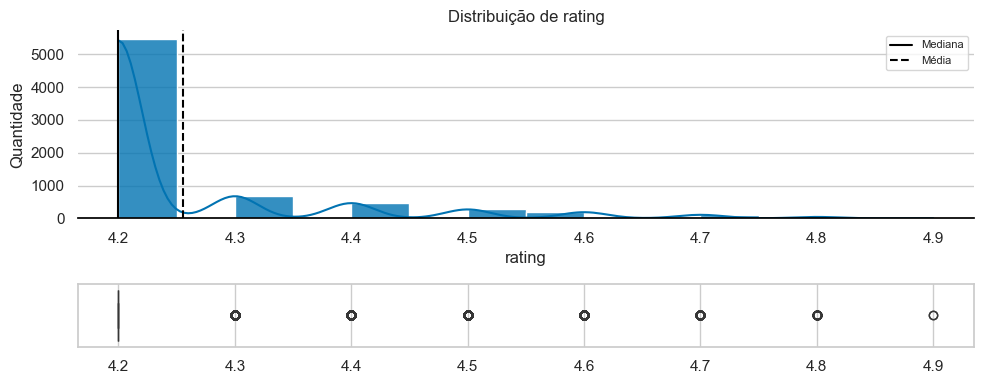

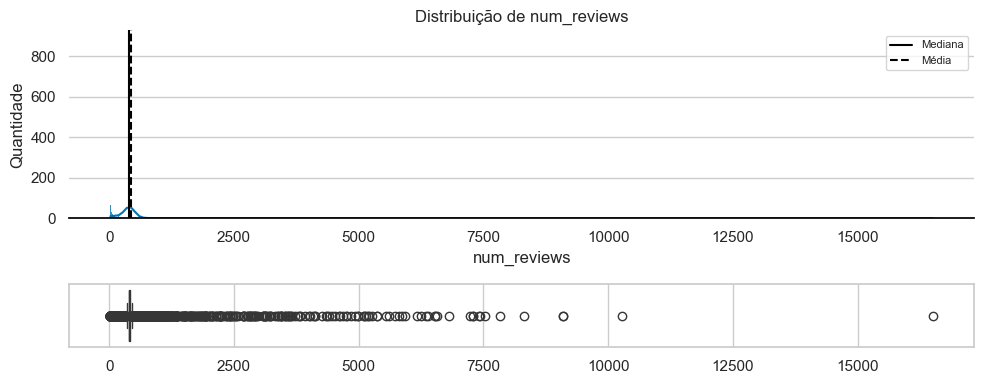

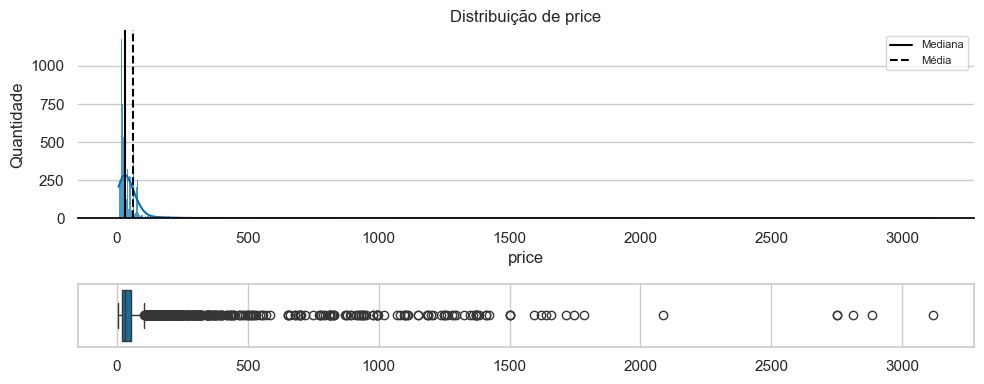

In [17]:
# @title Variáveis quantitativas 
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

for variavel in variaveis_quantitativas:
    fig, axes = plt.subplots(figsize=(10, 4), nrows=2, gridspec_kw={"height_ratios": [3, 1]})
    
    # Histograma + KDE
    ax = sns.histplot(data=df, x=variavel, ax=axes[0], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df, x=variavel, ax=axes[1])
    axes[1].set(xlabel="")  # Remove título do eixo X para não sobrecarregar
    
    plt.tight_layout()
    plt.show()

### Análise Bivariada

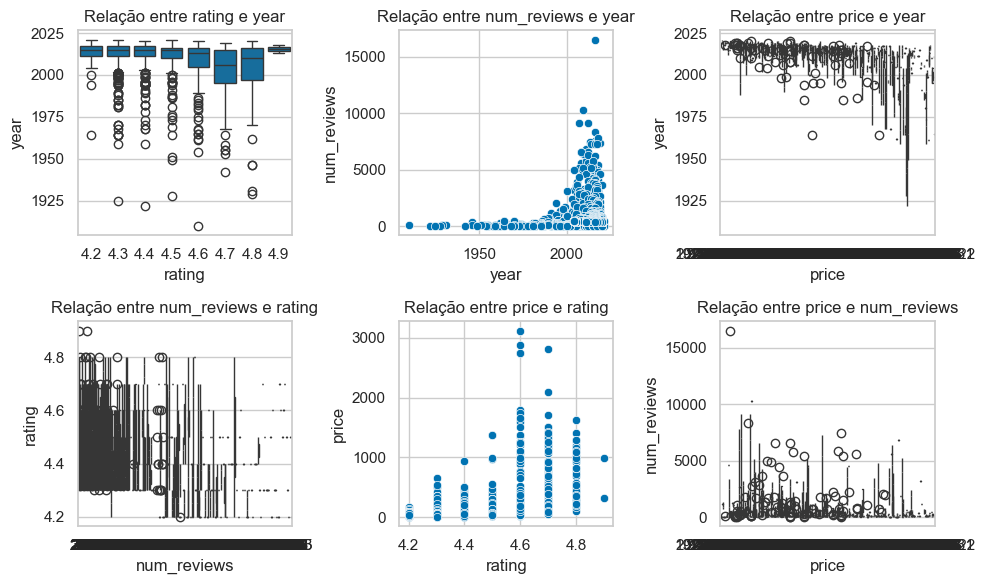

In [18]:
# @title Comportamento par a par

combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar número de colunas e linhas dinamicamente
ncols = 3  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular número de linhas necessário

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Relação entre {var_2} e {var_1}")

# Remover eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

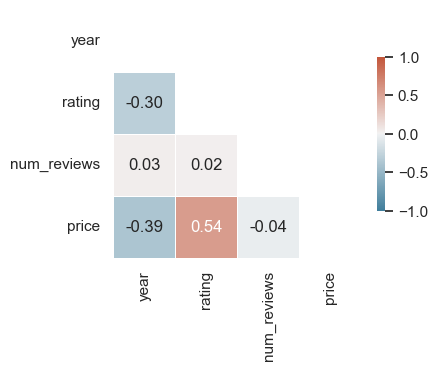

In [19]:
# @title Correlação
corr = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

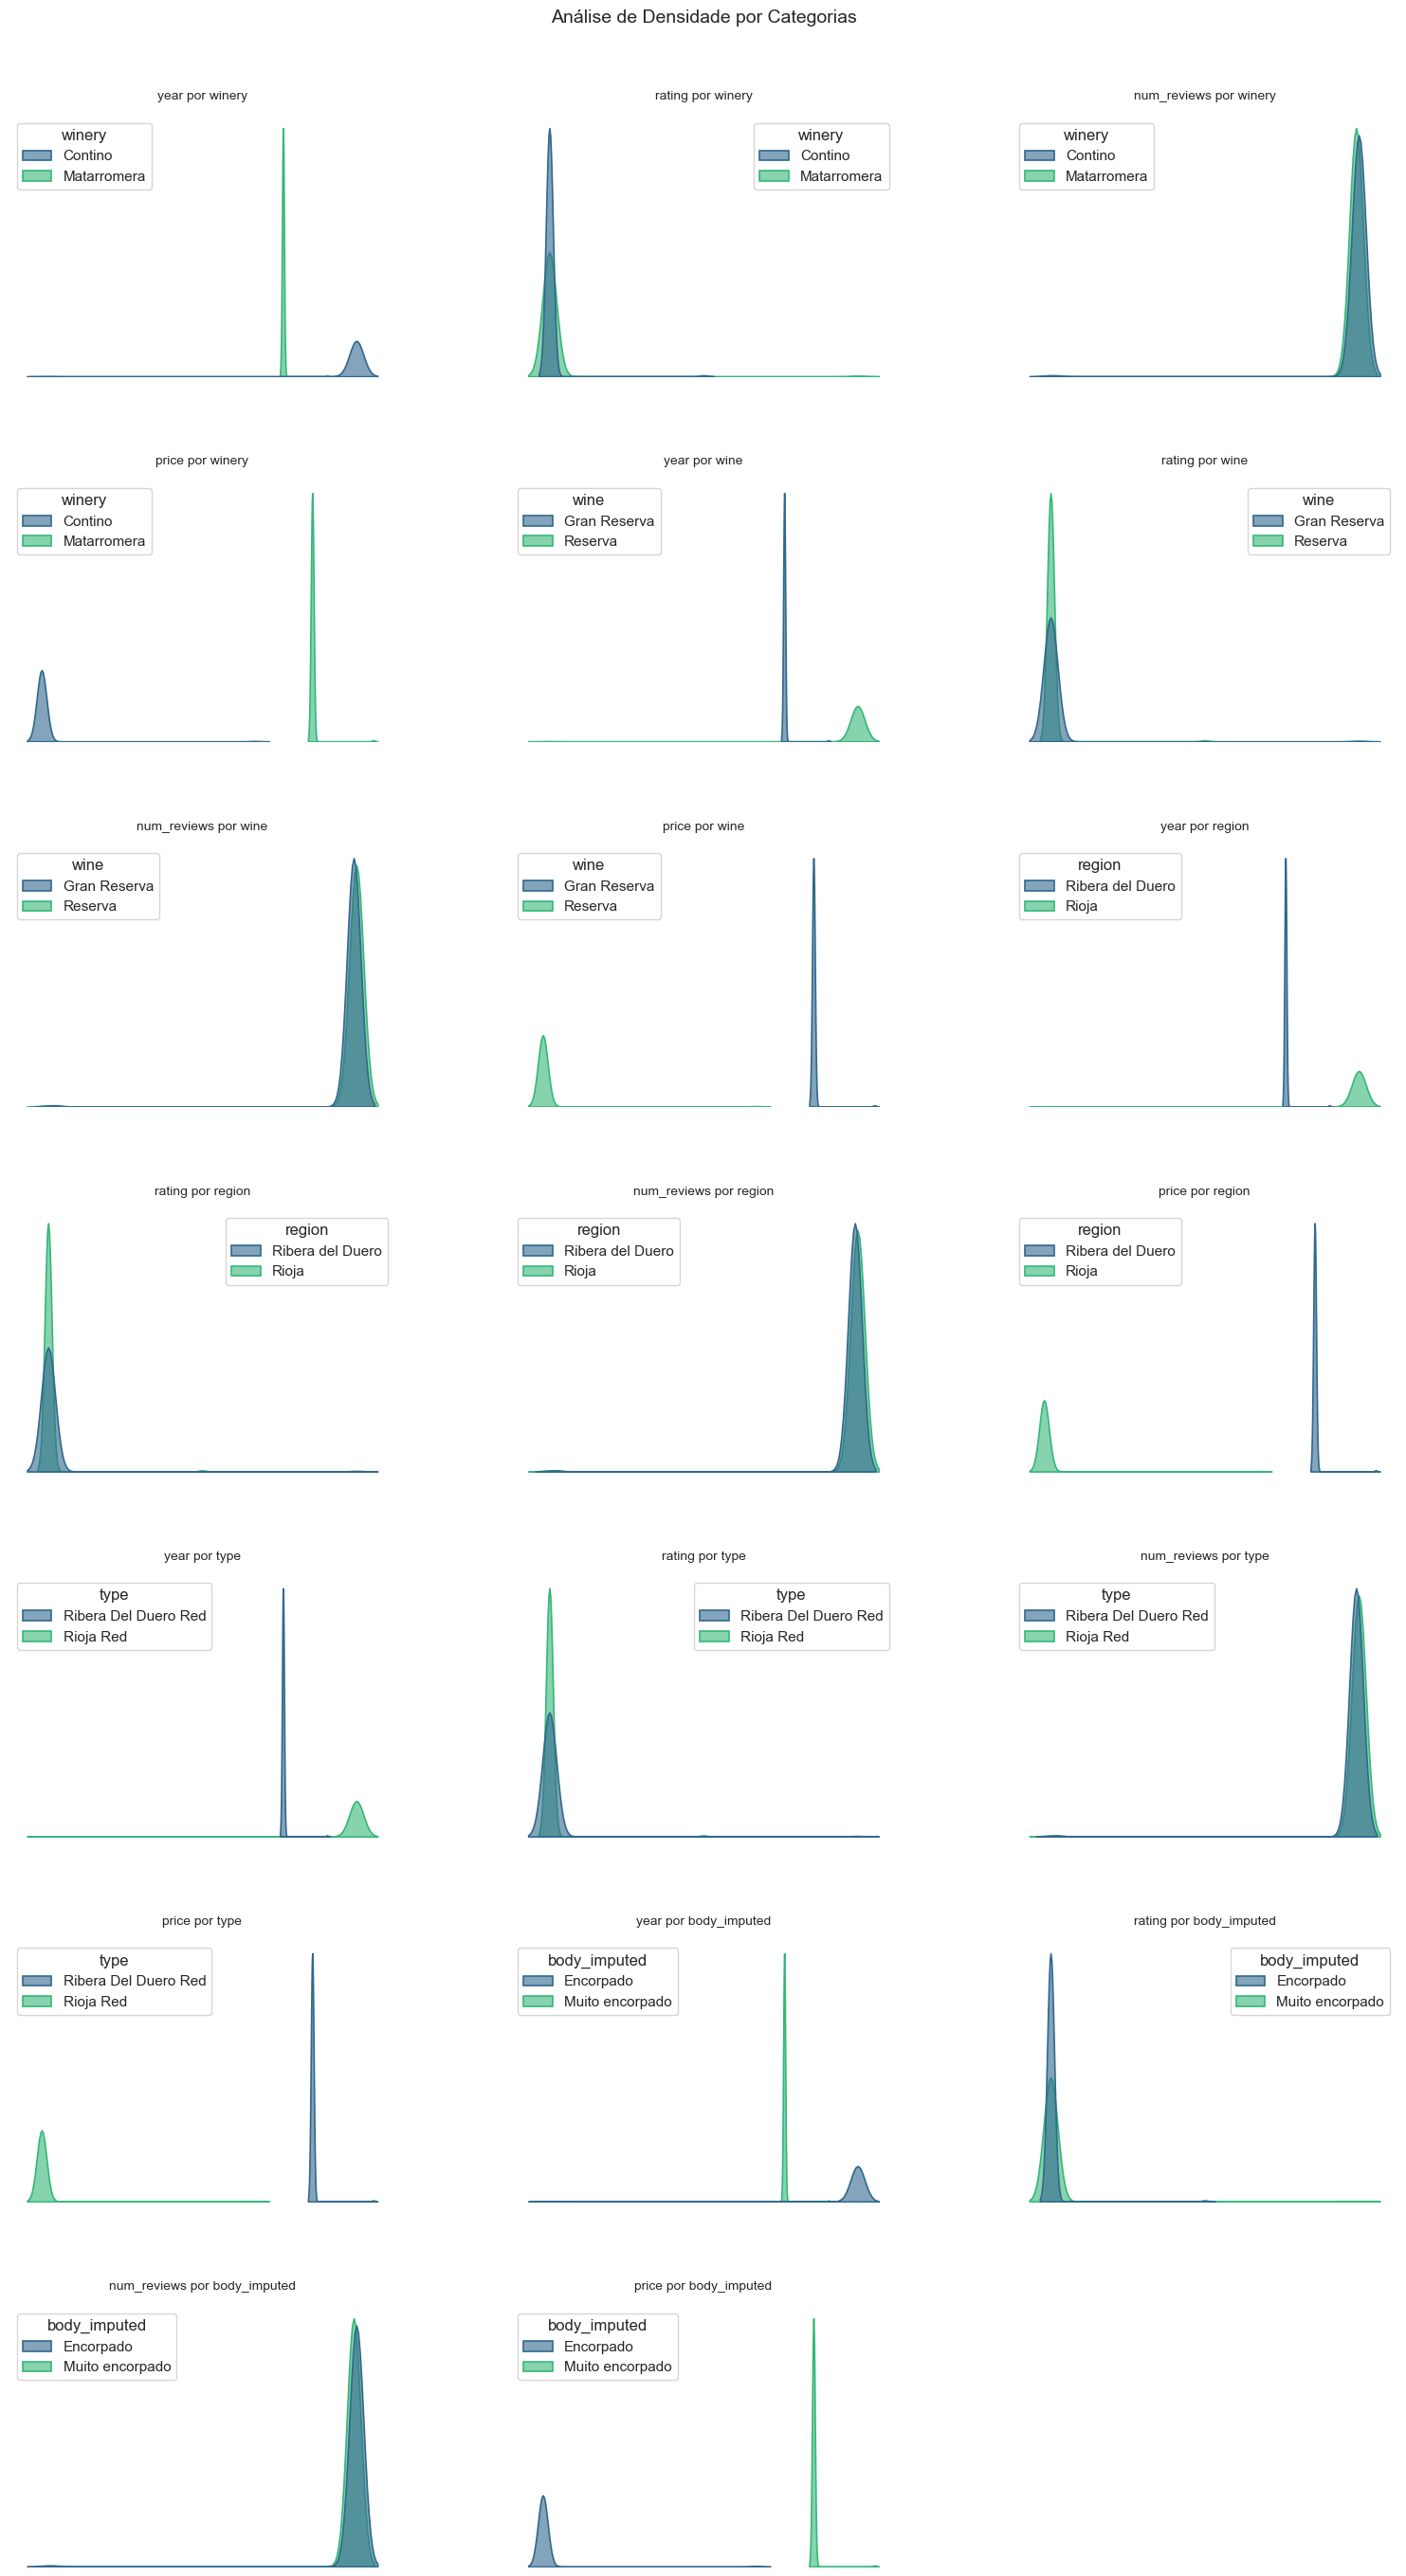

In [20]:
# @title Contingência
# Configuração estética inicial
sns.set_theme(style="whitegrid")

# 1. Filtragem eficiente combinando máscaras
masks = []
for col in variaveis_qualitativas:
    top_categorias = df[col].value_counts().nlargest(5).index
    masks.append(df[col].isin(top_categorias))

df_filtered = df[pd.concat(masks, axis=1).all(axis=1)].copy()

# 2. Otimização de memória com categorias
for col in variaveis_qualitativas:
    df_filtered[col] = (
        df_filtered[col]
        .astype('category')
        .cat.remove_unused_categories()
    )

# 3. Geração de combinações válidas
combinacoes_validas = [
    (q, qn) for q, qn in itertools.product(variaveis_qualitativas, variaveis_quantitativas)
    if df_filtered[q].nunique() > 1
]

# 4. Cálculo dinâmico do layout
n_graficos = len(combinacoes_validas)
n_cols = 3
n_rows = (n_graficos + n_cols - 1) // n_cols  # Arredondamento para cima
figsize = (min(n_cols * 5, 25), n_rows * 4)

fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=figsize,
    squeeze=False
)

# 5. Função de plotagem robusta
def plot_kde(df, qual_var, quant_var, ax):
    data = df[[qual_var, quant_var]].dropna()

    # Verificação de dados adequados
    if len(data) < 10 or data[qual_var].nunique() < 2:
        ax.axis('off')
        return

    # Plotagem com tratamento de erro
    try:
        sns.kdeplot(
            data=data,
            x=quant_var,
            hue=qual_var,
            ax=ax,
            fill=True,
            common_norm=False,
            palette='viridis',
            alpha=0.6,
            linewidth=1.2,
            warn_singular=False
        )
    except Exception as e:
        print(f"Erro ao plotar {quant_var} vs {qual_var}: {str(e)}")
        ax.axis('off')
        return

    # Configuração da legenda condicional
    handles, labels = ax.get_legend_handles_labels()
    if labels:
        ax.legend(
            title=qual_var,
            labels=labels,
            handles=handles,
            fontsize=8,
            title_fontsize=9,
            frameon=True,
            bbox_to_anchor=(1.05, 1),
            loc='upper left'
        )
    else:
        # Remove eixos se não houver legenda
        ax.axis('off')

    # Estilização final
    ax.set_title(f"{quant_var} por {qual_var}", fontsize=10, pad=12)
    ax.set_xlabel(quant_var, fontsize=9)
    ax.set_ylabel('Densidade', fontsize=9)
    ax.tick_params(axis='both', labelsize=8)
    sns.despine(left=True)

# 6. Plotagem com tratamento de subplots vazios
for ax in axes.flatten():
    ax.set_visible(False)  # Oculta todos inicialmente

for ax, (q, qn) in zip(axes.flatten(), combinacoes_validas):
    ax.set_visible(True)
    plot_kde(df_filtered, q, qn, ax)

# 7. Ajustes finais profissionais
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
plt.suptitle("Análise de Densidade por Categorias", fontsize=14, y=0.97)
plt.show()

In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# --- VARIÁVEIS DISPONÍVEIS ---
variaveis_quantitativas = ['year', 'rating', 'num_reviews', 'price']
variaveis_qualitativas = ['winery', 'wine', 'region', 'type', 'body_imputed', 'acidity_imputed']

# --- FACETÁVEIS: Apenas variáveis com <= 10 categorias únicas ---
facetaveis = [v for v in variaveis_qualitativas if df[v].nunique() <= 10]

# --- WIDGETS ---
x_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='price',
    description='Eixo X:',
    layout=widgets.Layout(width='250px')
)

y_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='rating',
    description='Eixo Y:',
    layout=widgets.Layout(width='250px')
)

color_dropdown = widgets.Dropdown(
    options=variaveis_qualitativas,
    value='type',
    description='Colorir por:',
    layout=widgets.Layout(width='250px')
)

facet_dropdown = widgets.Dropdown(
    options=[None] + facetaveis,
    value=None,
    description='Faceta:',
    layout=widgets.Layout(width='250px')
)

# Filtros por faixa de preço e ano
preco_min, preco_max = int(df['price'].min()), int(df['price'].max())
ano_min, ano_max = int(df['year'].min()), int(df['year'].max())

price_slider = widgets.IntRangeSlider(
    value=[preco_min, preco_max],
    min=preco_min,
    max=preco_max,
    step=1,
    description='Faixa Preço:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

year_slider = widgets.IntRangeSlider(
    value=[ano_min, ano_max],
    min=ano_min,
    max=ano_max,
    step=1,
    description='Ano:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

# --- FUNÇÃO PARA ATUALIZAR O GRÁFICO ---
def atualizar_grafico(x, y, color, facet, price_range, year_range):
    df_filtrado = df[
        (df['price'] >= price_range[0]) & (df['price'] <= price_range[1]) &
        (df['year'] >= year_range[0]) & (df['year'] <= year_range[1])
    ].copy()

    # Reduzir número de categorias na faceta (para evitar erro no plotly)
    if facet is not None and df_filtrado[facet].nunique() > 6:
        top_categorias = df_filtrado[facet].value_counts().index[:6]
        df_filtrado = df_filtrado[df_filtrado[facet].isin(top_categorias)]

    fig = px.scatter(
        df_filtrado,
        x=x,
        y=y,
        color=color,
        facet_col=facet,
        opacity=0.6,
        hover_data=['wine', 'winery', 'region'],
        title=f"{y} vs {x} segmentado por {color}" + (f" e facetas por {facet}" if facet else ""),
        template="plotly_white"
    )
    fig.update_layout(height=600)
    fig.show()

# --- LAYOUT INTERATIVO ---
ui = widgets.VBox([
    widgets.HBox([x_dropdown, y_dropdown]),
    widgets.HBox([color_dropdown, facet_dropdown]),
    price_slider,
    year_slider
])

out = widgets.interactive_output(
    atualizar_grafico,
    {
        'x': x_dropdown,
        'y': y_dropdown,
        'color': color_dropdown,
        'facet': facet_dropdown,
        'price_range': price_slider,
        'year_range': year_slider
    }
)

# --- EXIBIR INTERFACE ---
display(ui, out)




Output()